In [5]:
#Imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Constants

In [6]:
class Constants:
    """
    Important Constants for Calculations
        c = Speed of light (m/s)

        Mu0 = permeability of free space in H/m

        MuB = Bohr magneton in J/T

        Epsilon0 = permittivity of free space in F/m

        amu = atomic mass unit in kg

        HBar = reduced planck's constant in Js

        kB = Stegan-Boltzman constant in J/K

        h = planck's constat in Js

        a0 = bohr radius in dm

        g = gravitational acceleration in m/s^2

        Lamdba1064 = 1064nm in m
    """

    #Constants
    c = 2.99792458e8
    Mu0 = 4*np.pi*1e-7
    MuB = 9.2740095e-24
    Epsilon0 = 8.854187e-12
    amu = 1.66053906892e-27
    HBar = 1.054571628e-34
    kB = 1.3806504e-23
    h = 6.62607015e-34
    a0 = 0.52917720859e-10
    g = 9.807 
    
    #Conversions
    Lambda1064 = 1064e-9


# Atomic Properties

In [7]:
class Cs133:
    """This class stores atomic properties of cesium-133."""
    mass = 132.905451931 * Constants.amu  # atomic mass in kg

    class GS: #ground state
        g_j = 2.002540261 #fine structure landé g-factor
        aHF = Constants.h * 2.2981579425e9 #hyperfine structure constant in J

    class D1: #D1 Transition
        wavelength = 894.59295987e-9  # wavelength (in vaccum) in m
        Gamma = 2 * np.pi * 4.575e6  # decay rate in rad/s
    
    class D2: #D2 Transition
        wavelength = 852.34727582e-9  # wavelength (in vacuum) in m
        Gamma = 2 * np.pi * 5.234e6  # decay rate in rad/s


In [8]:
class Li6:
    """This class stores atomic properties of lithium-6."""
    mass = 6.0151214 * Constants.amu  # atomic mass in kg

    class GS: #ground state
        g_j = 2.0023010 #Total electronic g-factor 
        aHF = Constants.h * 152.1368407e6 # hyperfine structure constrant in J

    class D1: #D1 transition
        wavelength = 670.992421e-9 # wavelength in m
        Gamma = 2 * np.pi * 5.8724e6 # decay rate in rad/s
    
    class D2: #D2 transition
        wavelength = 670.992421e-9 # wavelength in m
        Gamma = 2 * np.pi * 5.8724e6 # decay rate in rad/s


# Electric Field Intensity

The general expression for the intensity of a gaussian electric field propagating in the x direction is:
$$ I(r,x) = \frac{P}{\pi \omega(x)^2 /2} e^{-2 \frac{r^2}{\omega(x)^2}}$$

where:
- P is the beam power in watts
- $\omega(x)$ is the beam waist

If we assume that the beam waist can be split into the waist in the y direction and the waist in the z direction, then the intensity can be rewritten as:
$$ I(y,z) = \frac{P}{\pi \omega_y \omega_z / 2} e^{-2 \frac{y^2}{\omega_y^2}} e^{-2 \frac{z^2}{\omega_z^2}} $$

Where $\omega_y$ and $\omega_z$ are the beam waists in y and z respectively

In [14]:
def field_intensity(y,z, *args):
    """
    Function for computing the beam intensity of a gaussian laster beam

    args:
        y: y-position (in  microns)
        z: z-position (in microns)
        args: (power in W, beam waist in the y direction in m, beam waist in the z direction in m)
    
    returns: Laser Intensity in (W/m^2)
    """

    #get parameters
    args = args[0]
    
    power = args[0]
    bw_y = args[1]
    bw_z = args[1]

    #convert distances to m
    y = y*1e-6
    z = z*1e-6

    #compute the field instensity
    coef = power/ (np.pi * bw_y * bw_z / 2)
    
    return coef * np.exp(-2 * y**2 / bw_y**2) * np.exp(-2 * z**2 / bw_z**2)

If we graph it

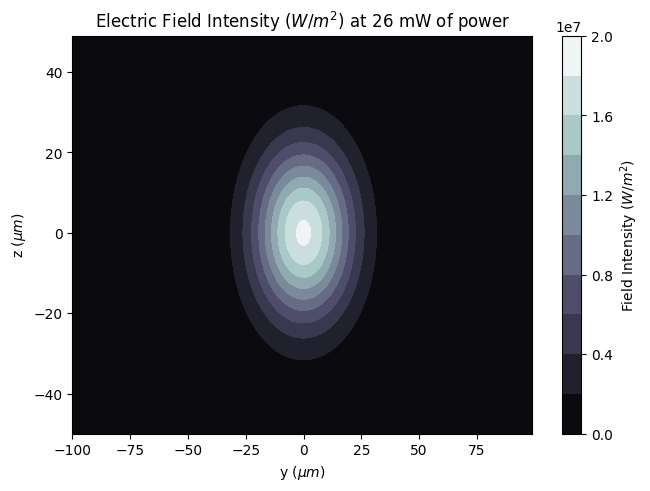

In [ ]:
field_args = (26e-3, 30e-6, 30e-6)

y = np.arange(-100, 100)
z = np.arange(-50, 50)

Y, Z = np.meshgrid(y, z)
intensity = field_intensity(Y,Z, field_args)

fig1, ax2 = plt.subplots(layout = 'constrained')

CS = ax2.contourf(Y, Z, intensity, 10, cmap=plt.cm.bone)

ax2.set_title(r'Electric Field Intensity ($W/m^2$) at 26 mW of power')
ax2.set_xlabel(r"y ($\mu m$)")
ax2.set_ylabel(r"z ($\mu m$)")

#add color bar
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r"Field Intensity ($W/m^2$)")
plt.show()

# The Potential

## Dipole Potential

The general expression for the dipole potential is
$$ U_{dip} = \frac{\pi c^2 \Gamma}{2\omega_0^2} \left( \frac{2 + Pg_F m_F}{\Delta_{2,F}} + \frac{1 - Pg_F m_F}{\Delta_{1,F}} \right) I(\vec{r})$$

Where:
- $\Gamma$ is the decay rate of the excited state in rad/s
- $\omega_0$ is the resonant frequency of the transition in m
- $P$ is a coefficient which characterizes the polarization
    - $P = 0$ for linear polarization
    - $P = \pm 1$ for circular polarization

- $g_F$ is the landé g-factor
- $m_F$ is the magnetic quantum number
- $\Delta_{i_f} = \omega - \omega_0$ is the frequency detuning for the D1 or D2 transition
- $I(\vec{r})$ is the intensity as a function of position

For this calculation we will be dealing with linealy polarized light and a laser beam propagating in the x-direction so the expression reduces to:
$$ U_{dip} = \frac{\pi c^2 \Gamma}{2\omega_0^2} \left( \frac{2}{\Delta_{2,F}} + \frac{1}{\Delta_{1,F}} \right) I(y,z)$$

In [33]:
def dipole_potential(y,z, *args):
    """
    Function for computing electric dipole potential

    inputs:
        y: y-position in microns
        z: z-position in microns
        args: tuple
            - gamma: decay rate in rad/s
            - lambda_laser: laser wavelength in m
            - lambda_D1: D1 transition frequency in m
            - lambda_D2: D1 transition frequenct in m
            - intensity_args: parameters for field_intensity (see above)
    
    returns: Dipole potential in (?)
    """
    #get parameters
    args=args[0]
    gamma = args[0]

    lambda_laser = args[1]
    lambda_D1 = args[2]
    lambda_D2 = args[3]

    intensity_args = args[4]

    omega = 2*np.pi*Constants.c / lambda_laser
    omega01 = 2*np.pi*Constants.c / lambda_D1
    omega02 = 2*np.pi*Constants.c / lambda_D2

    delta1 = omega - omega01
    delta2 = omega - omega02

    coef = (np.pi * Constants.c**2 *gamma)/(2* omega02**2)

    intensity = field_intensity(y,z, intensity_args)

    return coef * (2/delta2 + 1/delta1) * intensity

We can try to graph this for Cs133 and a 1064nm laser to get a look at what the dipole potential should look like for the experiment

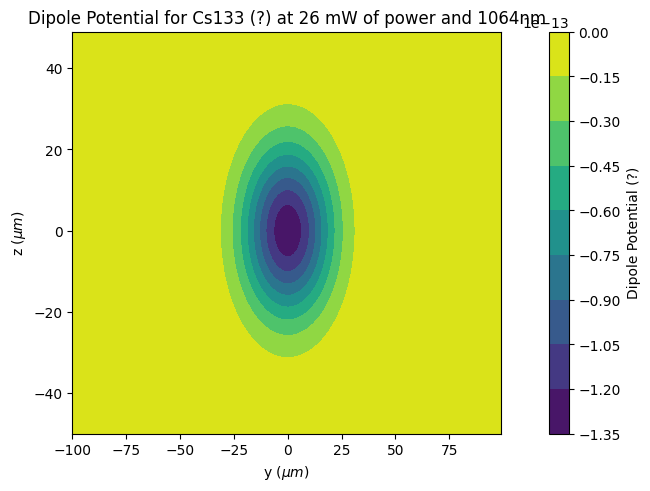

In [36]:
gamma = Cs133.D2.Gamma

lambda_laser = Constants.Lambda1064
lambda_D1 = Cs133.D1.wavelength
lambda_D2 = Cs133.D2.wavelength

field_args = (26e-3, 30e-6, 30e-6)

dipole_potential_args = (gamma, lambda_laser, lambda_D1, lambda_D2, field_args)

y = np.arange(-100, 100)
z = np.arange(-50, 50)

Y, Z = np.meshgrid(y, z)
dip_potential = dipole_potential(Y,Z, dipole_potential_args)

fig1, ax2 = plt.subplots(layout = 'constrained')

CS = ax2.contourf(Y, Z, dip_potential, 10, cmap=plt.cm.viridis)

ax2.set_title('Dipole Potential for Cs133 (?) at 26 mW of power and 1064nm')
ax2.set_xlabel(r"y ($\mu m$)")
ax2.set_ylabel(r"z ($\mu m$)")

#add color bar
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r"Dipole Potential (?)")

plt.show()

## Magnetic Potential

The Bitter coils used in the experiment will also contribute to the total potential experienced by the atoms. Here we assume that the atoms will be at the maximum of the field and that the field itself will be cylindrically symmetric about the z axis due to the orientation of the coils. The magnetic field will approximately be of the form:
$$ B = \omega_B (x^2 + y^2) - 2\omega_B z^2 $$

Where $\omega_B = 2 \times 10^5$ is the approximate frequency of the magnetic trap used in the experiment

In [37]:
def magnetic_field(x,y,z):
    """
    Function for calculating the magnetic field intenstity

    inputs:
        x,y,z: position in microns
    
    returns: Magnetic field strength in Teslas
    """
    omegaB = 2e5

    #convert units to microns
    x = x*1e-6
    y = y*1e-6
    z = z*1e-6

    return omegaB * (x**2 + y**2) - 2*omegaB * z**2

From this, the magnetic potential will be:
$$ U_B = -\frac{\mu_B g_J}{2} \frac{B}{10000} $$

In [38]:
def magnetic_potential(x,y,z, *args):
    """
    Function for calculating the magnetic field potential for an atom

    inputs:
        - x,y,z: position in microns
        - args:
            - g_j: landé g-factor
    
    returns: Magnetic field potential in ?
    """
    g_j = args[0]

    coef = - (Constants.MuB * g_j)/2

    B = magnetic_field(x,y,z)

    return coef * B / (1e4)

If we graph it for cesium 133

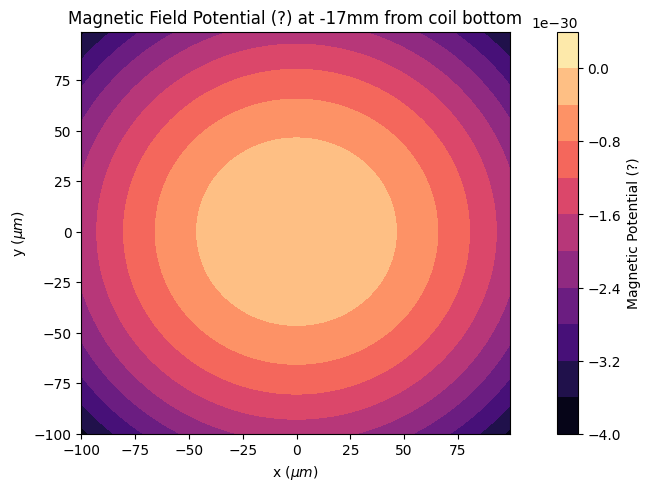

In [41]:
b_potential_args = (Cs133.GS.g_j)
atom_height = -17e-3 #where the atoms should be

x = np.arange(-100, 100)
y = np.arange(-100, 100)

X, Y = np.meshgrid(x,y)
b_potential = magnetic_potential(X,Y,atom_height, b_potential_args)

fig1, ax2 = plt.subplots(layout = 'constrained')

CS = ax2.contourf(X, Y, b_potential, 10, cmap=plt.cm.magma)


ax2.set_title('Magnetic Field Potential (?) at -17mm from coil bottom')
ax2.set_xlabel(r"x ($\mu m$)")
ax2.set_ylabel(r"y ($\mu m$)")

#add color bar
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r"Magnetic Potential (?)")

plt.show()

## Gravitational Potential

The gravitational potential is given by the simple formula:
$$ U_{grav} = mgz $$

In [42]:
def grav_potential(z, *args):
    """
    Function for computing the gravitational potential energy of an atom

    inputs:
        - z: height in microns
        - args:
            - m: mass in kg
    
    returns: gravitational potential in J
    """
    m = args[0]

    return m * Constants.g * z*1e-6

We can graph this for cesium

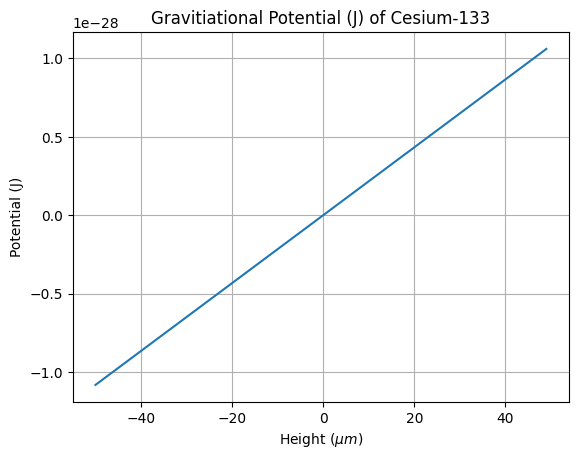

In [44]:
z = np.arange(-50,50)

plt.plot(z, grav_potential(z, (Cs133.mass)))

plt.title("Gravitiational Potential (J) of Cesium-133")
plt.xlabel(r"Height ($\mu m$)")
plt.ylabel("Potential (J)")

plt.grid(True)
plt.show()

## Total Potential

The total potential will just be the sum of the above three potentials:
$$ U_{tot} = U_{dip} + U_B + U_{grav}  $$

In [45]:
def total_potential(x,y,z, *args):
    """
    Function for computing the total potential experienced by an atom

    inputs:
        - x,y,z: position in microns
        - args:
            - dipole_params: parameters for dipole potential (see dipole_potential)
            - b_params: parameters for the magnetic field (see magnetic_potential)
            - grav_params: parameters for gravitational potential (see grav_potential)
    """
    dipole_params = args[0]
    b_params = args[1]
    grav_params = args[2]

    u_dip = dipole_potential(y,z, dipole_params)

    u_b = magnetic_potential(x,y,z, b_params)
    u_grav = grav_potential(z, grav_params)

    return u_dip + u_b + u_grav